### Treść zadania

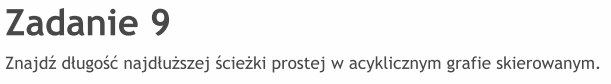

# I Sposób
### (Z wykorzystaniem algorytmów grafowych)

### Omówienie algorytmu

Najpierw sortujemy topologicznie graf, a następnie, przechodzimy w kolejności posortowanych topologicznie wierzchołków i dla każgo z wierzchołków, sprawdzamy w pętli wszystkich jego sąsiadów, a następnie, jeżeli długość znalezionej ścieżki od tego wierzchołka do jego sąsiada jest większa niż długość poprzedniej najdłuższej ścieżki, zapisujemy nową (większą) długość ścieżki.

### Złożoność

###### Obliczeniowa:
$ O(V + E) $
###### Pamięciowa:
$ O(V) $ - uznaję, że graf jest dany na wejściu, więc nie wliczam go do złożoności

### Implementacja

In [1]:
def topological_sort(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = [None] * n
    idx = n
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal idx
        idx -= 1
        result[idx] = u
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return result


def longest_path(G: 'DAG'):
    n = len(G)
    t_sorted = topological_sort(G)
    dist = [0] * n
    
    for u in t_sorted:
        for v in G[u]:
            dist[v] = max(dist[v], dist[u] + 1)
            
    return max(dist)

###### Kilka testów

##### Pomocnicze:

In [2]:
def directed_graph_list(E: 'array of edges'):
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

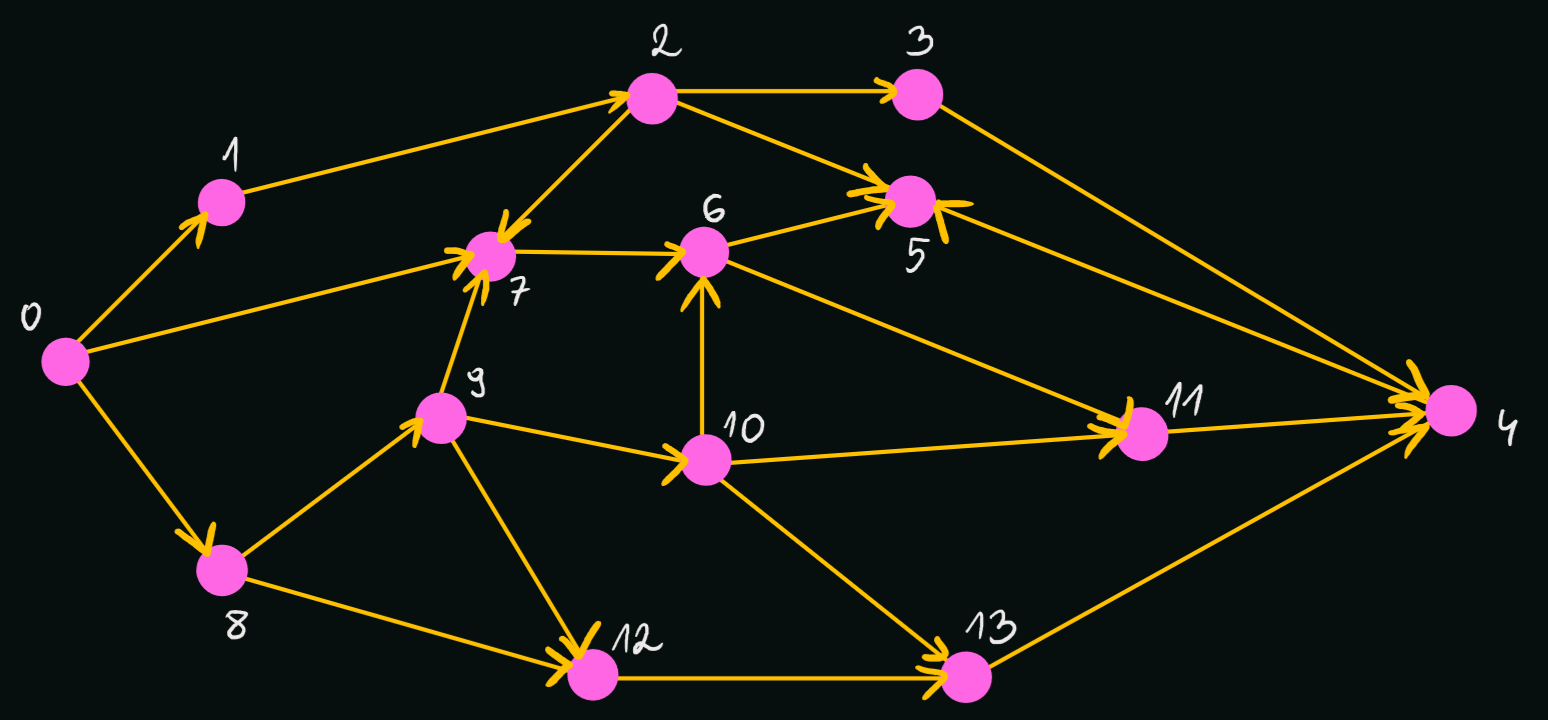

In [3]:
E = [(0, 1), (0, 7), (0, 8), (1, 2), (2, 3), (2, 5), (2, 7), (3, 4), (4, 5), (6, 5), (6, 11), (7, 6),
     (8, 9), (8, 12), (9, 10), (9, 7), (9, 12), (10, 6), (10, 11), (10, 13), (11, 4), (12, 13), 
     (13, 4)]
G = directed_graph_list(E)

print(longest_path(G))

7


### (Dodatkowo) Odtwarzanie najdłuższej ścieżki

In [4]:
def topological_sort(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = [None] * n
    idx = n
    
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal idx
        idx -= 1
        result[idx] = u
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return result


def get_path(parents, t):
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    return path


def longest_path(G: 'DAG'):
    n = len(G)
    t_sorted = topological_sort(G)
    dist = [0] * n
    parents = [None] * n
    
    for u in t_sorted:
        for v in G[u]:
            if dist[u] + 1 > dist[v]:
                dist[v] = dist[u] + 1
                parents[v] = u
            
    max_v = 0
    for v in range(n):
        if dist[v] > dist[max_v]:
            max_v = v
            
    return dist[max_v], get_path(parents, max_v)

###### Kilka testów

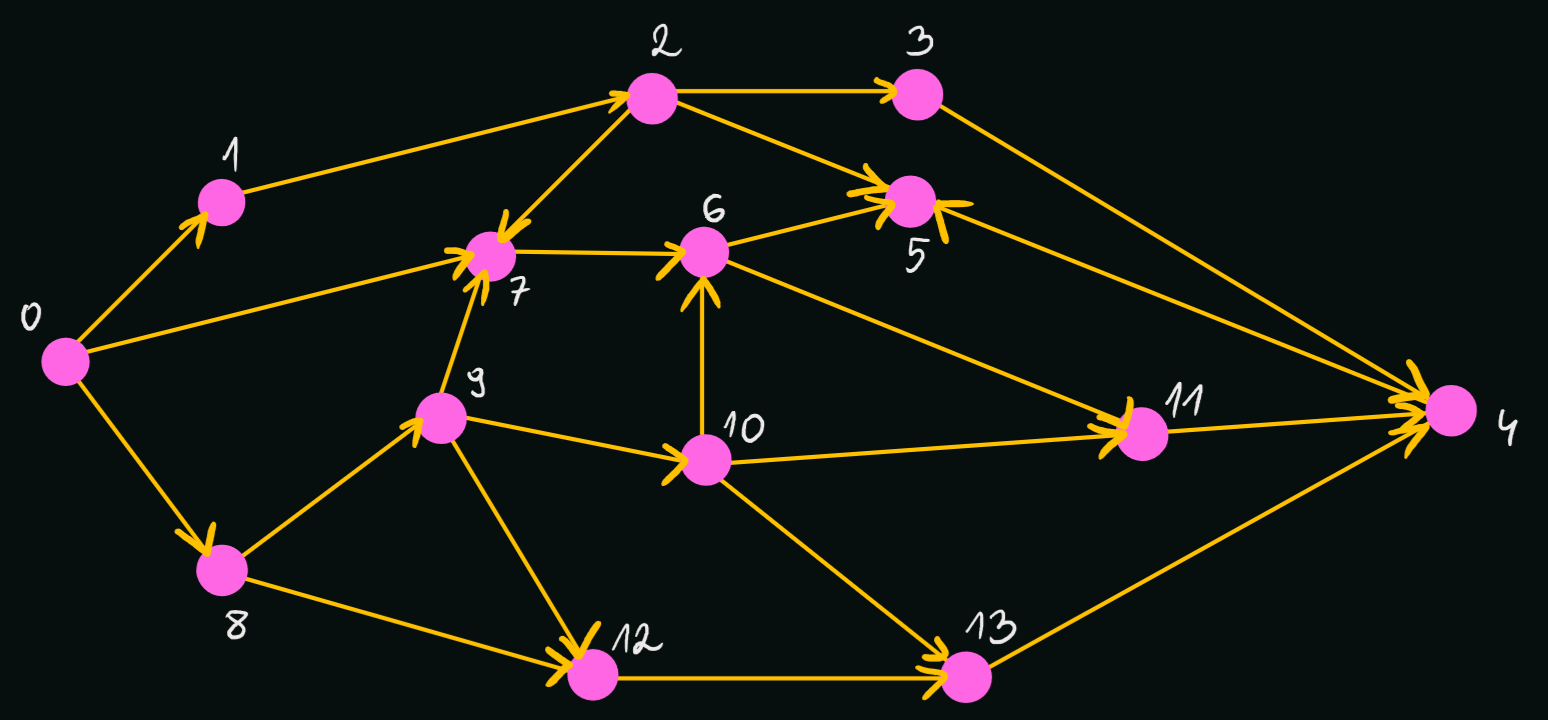

In [5]:
E = [(0, 1), (0, 7), (0, 8), (1, 2), (2, 3), (2, 5), (2, 7), (3, 4), (4, 5), (6, 5), (6, 11), (7, 6),
     (8, 9), (8, 12), (9, 10), (9, 7), (9, 12), (10, 6), (10, 11), (10, 13), (11, 4), (12, 13), 
     (13, 4)]
G = directed_graph_list(E)

print(longest_path(G))

(7, [0, 8, 9, 10, 6, 11, 4, 5])


# II Sposób
### (Z wykorzystaniem programowania dynamicznego)

### Omówienie algorytmu

Tak naprawdę to ten algorytm opiera się na rekurencji ze spamiętywaniem i użyciu algorytmu do trawersacji grafów DFS (może być także BFS).

### Złożoność

Jak wyżej.
###### Obliczeniowa:
$ O(V + E) $
###### Pamięciowa:
$ O(V) $

### Implementacja

In [6]:
def longest_path(G: 'DAG'):
    n = len(G)
    dist = [0] * n
    
    def dfs(u):
        if not dist[u]:
            for v in G[u]:
                dist[u] = max(dist[u], dfs(v) + 1)
        return dist[u]
    
    max_dist = 0
    for u in range(n):
        max_dist = max(max_dist, dfs(u))
        
    return max_dist

###### Kilka testów

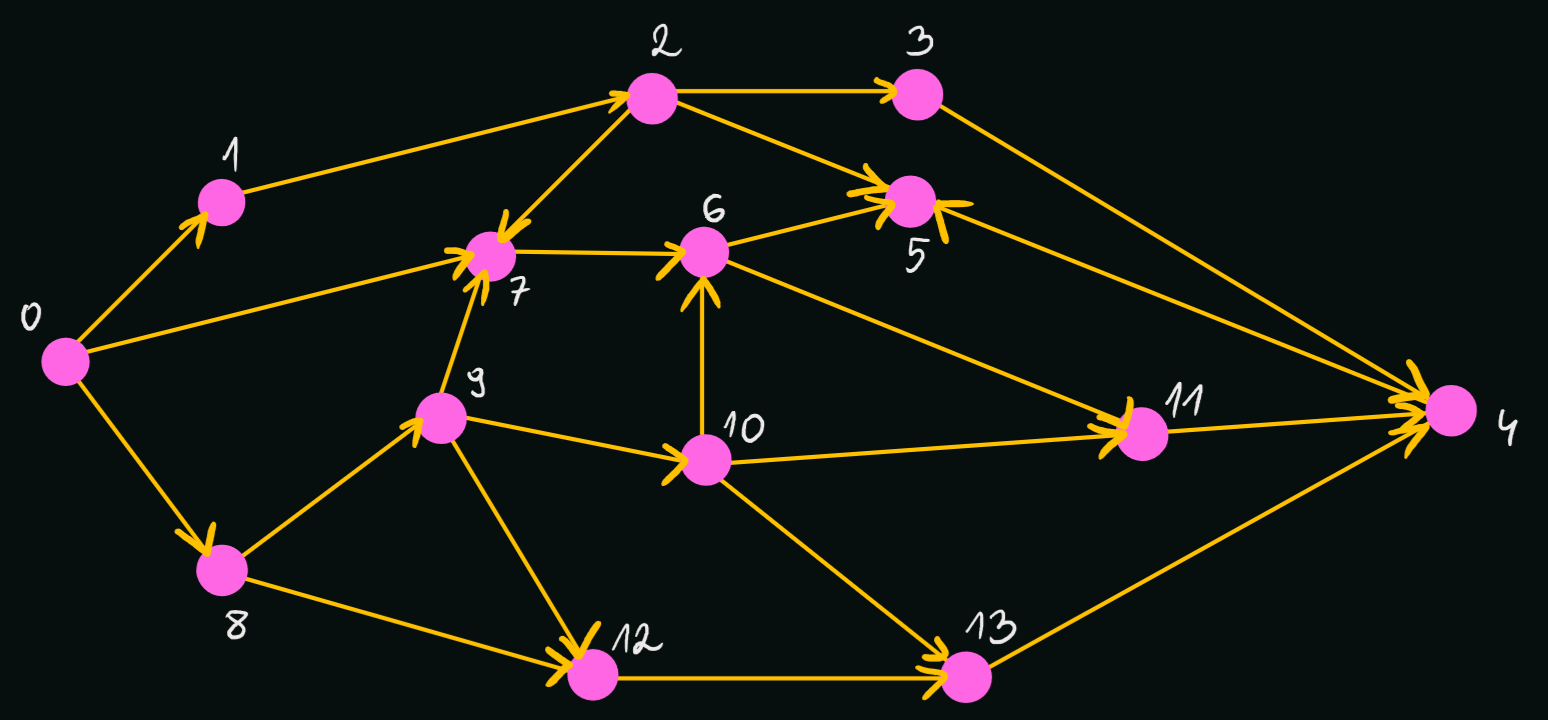

In [7]:
E = [(0, 1), (0, 7), (0, 8), (1, 2), (2, 3), (2, 5), (2, 7), (3, 4), (4, 5), (6, 5), (6, 11), (7, 6),
     (8, 9), (8, 12), (9, 10), (9, 7), (9, 12), (10, 6), (10, 11), (10, 13), (11, 4), (12, 13), 
     (13, 4)]
G = directed_graph_list(E)

print(longest_path(G))

7


### (Dodatkowo) Zwracanie ścieżki

In [8]:
def get_path(children, u):
    path = []
    
    while u is not None:
        path.append(u)
        u = children[u]
        
    return path


def longest_path(G: 'DAG'):
    n = len(G)
    dist = [0] * n
    children = [None] * n
    
    def dfs(u):
        if not dist[u]:
            for v in G[u]:
                curr_dist = dfs(v) + 1
                if curr_dist > dist[u]:
                    children[u] = v
                    dist[u] = curr_dist
        return dist[u]
    
    max_u = 0
    for u in range(n):
        if dfs(u) > dist[max_u]:
            max_u = u
        
    return dist[max_u], get_path(children, max_u)

###### Kilka testów

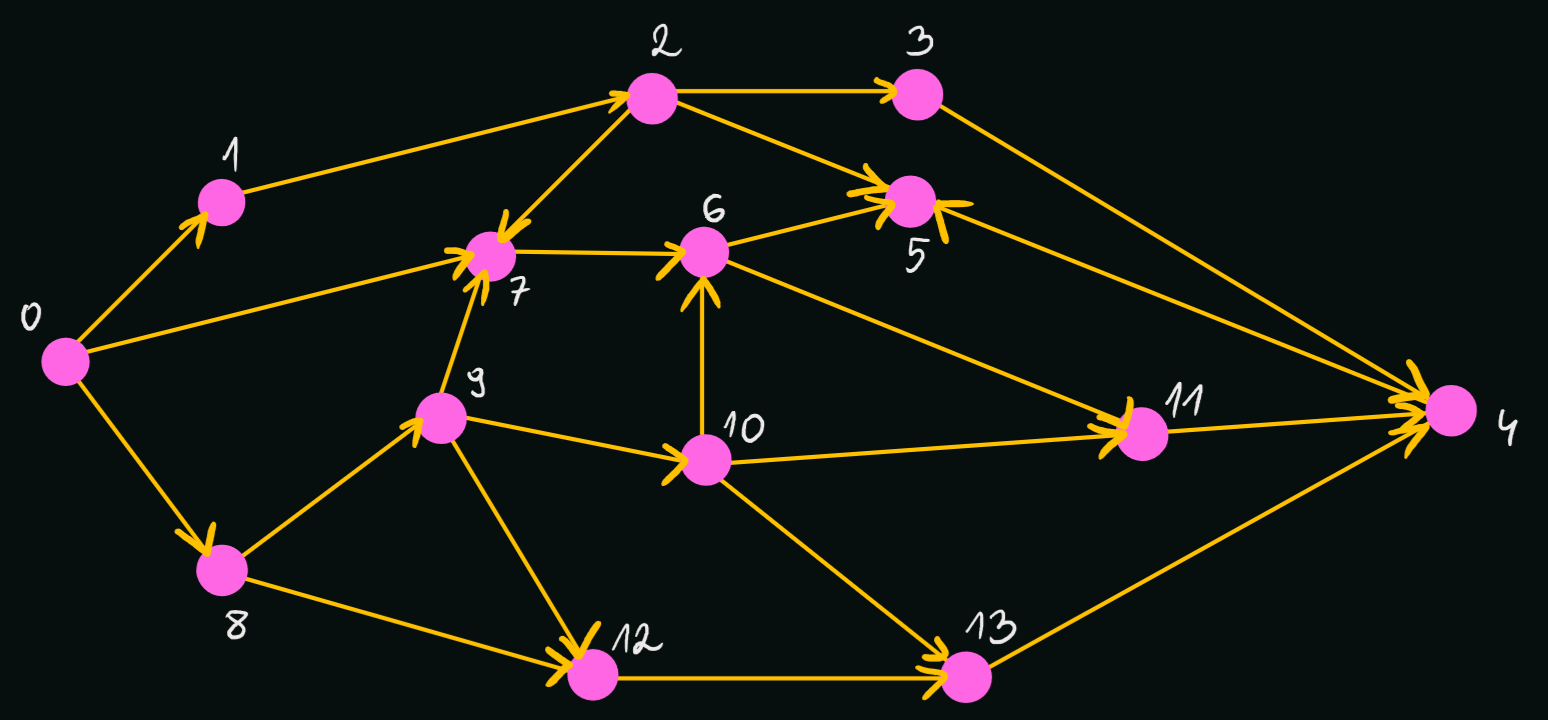

In [9]:
E = [(0, 1), (0, 7), (0, 8), (1, 2), (2, 3), (2, 5), (2, 7), (3, 4), (4, 5), (6, 5), (6, 11), (7, 6),
     (8, 9), (8, 12), (9, 10), (9, 7), (9, 12), (10, 6), (10, 11), (10, 13), (11, 4), (12, 13), 
     (13, 4)]
G = directed_graph_list(E)

print(longest_path(G))  # Nie musi być taka sama jak w I sposobie

(7, [0, 1, 2, 7, 6, 11, 4, 5])
